# One drug analysis

In the introduction we have analysed a IC50 input file. We performed a full analysis that is we analyse all associations between all drugs and 
all features. This may take a while and sometimes one is just interested in a single drug or a sub set of drugs. In this notebook, we show how to 
restrict the analysis.

In [7]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (10,6)

Populating the interactive namespace from numpy and matplotlib


As before, we create an ANOVA instance. Pur input IC50 will be the test file

In [9]:
from gdsctools import ANOVA, ic50_test

In [10]:
an = ANOVA(ic50_test)

INFO:root:Reading data and building data structures


Drugs are stored in the **drugIds** in case you forgot the drug you are interested in.. eg. the first drug identifer is 

In [15]:
drug_name = an.drugIds[0]

In [16]:
df = an.anova_one_drug(drug_name)

 [-----------------100%-----------------] 677 of 677 complete in 3.2 sec

In [17]:
# you currently need to manually add the FDR corrections
df = an.add_pvalues_correction(df)

In [19]:
df.ix[0:5]

,DRUG_ID,DRUG_NAME,DRUG_TARGET,FEATURE,FEATURE_ANOVA_pval,FEATURE_IC50_T_pval,FEATURE_IC50_effect_size,FEATURE_deltaMEAN_IC50,FEATUREneg_Glass_delta,FEATUREneg_IC50_sd,...,FEATUREpos_Glass_delta,FEATUREpos_IC50_sd,FEATUREpos_logIC50_MEAN,MSI_ANOVA_pval,N_FEATURE_neg,N_FEATURE_pos,TISSUE_ANOVA_pval,log max.Conc.tested,log max.Conc.tested2,ANOVA_FEATURE_FDR_%
ABCB1_mut,Drug_999_IC50,NaN,NaN,ABCB1_mut,0.868427,0.485861,0.314078,0.361057,0.312963,1.153674,...,0.537545,0.671677,2.800776,0.145989,370,5,0.000003,NaN,NaN,99.89083
ABL2_mut,Drug_999_IC50,NaN,NaN,ABL2_mut,0.668078,0.448976,0.439348,0.505005,0.438173,1.152523,...,6.658780,0.075840,2.945498,0.145899,372,3,0.000003,NaN,NaN,99.89083
ACVR2A_mut,Drug_999_IC50,NaN,NaN,ACVR2A_mut,0.335307,0.799005,0.097223,-0.111829,0.097386,1.148309,...,0.088610,1.262029,2.334792,0.145467,368,7,0.000003,NaN,NaN,99.89083
AFF4_mut,Drug_999_IC50,NaN,NaN,AFF4_mut,0.736907,0.834149,0.105328,0.121155,0.104942,1.154493,...,0.350319,0.345841,2.564396,0.145940,371,4,0.000003,NaN,NaN,99.89083
AHCTF1_mut,Drug_999_IC50,NaN,NaN,AHCTF1_mut,0.507475,0.285957,0.481094,0.552571,0.478667,1.154395,...,1.932464,0.285941,2.989736,0.145751,370,5,0.000003,NaN,NaN,99.89083


Now, you can create an HTML report or simply call one of the volcano plot

In [20]:
from gdsctools import volcano

In [21]:
v = volcano.VolcanoANOVA(df)

/home/cokelaer/Work/virtualenv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


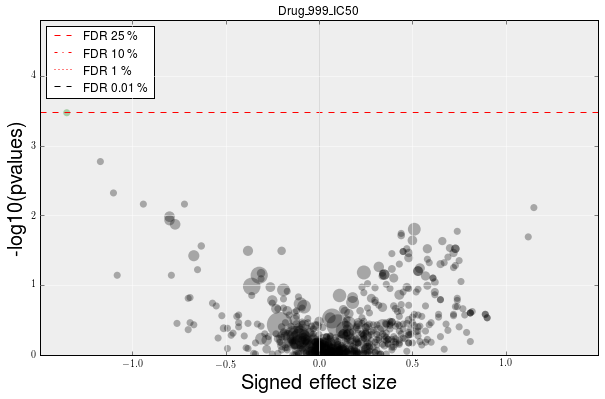

In [22]:
v.volcano_plot_one_drug(drug_name)

In [23]:
import mpld3

In [24]:
mpld3.enable_notebook()

In [25]:
mpld3.display(v.current_fig)

/home/cokelaer/Work/virtualenv/lib/python2.7/site-packages/mpld3/mplexporter/exporter.py:82: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


<hr>
<ht>
**Author: Thomas Cokelaer, Nov 2015**